# CoreMS Assignments to SRFA

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [1]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [2]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_6sigma.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks
11: /h

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.


#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

At 6 sigma, the total number of peaks in the SRFA datafile is illustrated with `len(mass_spectrum)`.


In [3]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 6

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 1, "H": 2}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[3]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_6sigma.pks


39940


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

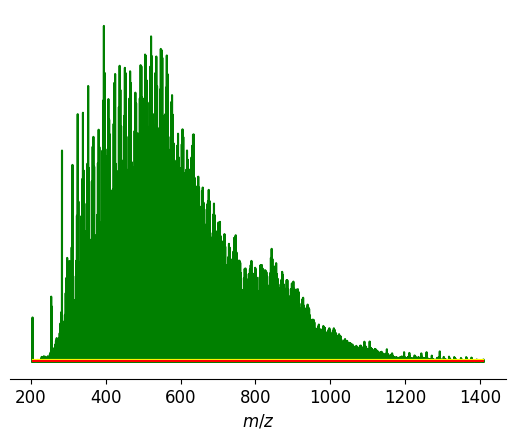

In [4]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [5]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | "
        f"{mspeak.resolving_power:.1f} resolving power | "
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD"
    )

Most abundant peaks (top 20):
1: 395.1347600 m/z | 102.7859 abundance | 3103604.0 resolving power | 1048.0 S/N | -0.6935 KMD
2: 521.0936700 m/z | 99.5833 abundance | 2513533.0 resolving power | 717.6 S/N | -0.5118 KMD
3: 547.1093300 m/z | 95.7520 abundance | 2446854.0 resolving power | 690.0 S/N | -0.4984 KMD
4: 549.1249800 m/z | 95.3919 abundance | 2453314.0 resolving power | 687.4 S/N | -0.5118 KMD
5: 505.0987600 m/z | 94.0320 abundance | 2561491.0 resolving power | 691.7 S/N | -0.5348 KMD
6: 563.1042400 m/z | 93.7429 abundance | 2361006.0 resolving power | 675.5 S/N | -0.4755 KMD
7: 507.1144100 m/z | 93.6710 abundance | 2566308.0 resolving power | 689.0 S/N | -0.5482 KMD
8: 523.1093300 m/z | 93.5580 abundance | 2503936.0 resolving power | 674.2 S/N | -0.5252 KMD
9: 535.1093300 m/z | 93.4272 abundance | 2451159.0 resolving power | 673.2 S/N | -0.5118 KMD
10: 551.1042500 m/z | 93.0134 abundance | 2420582.0 resolving power | 670.2 S/N | -0.4889 KMD
11: 521.1300600 m/z | 92.3821 abundan

In [6]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 1, 'H': 2}


### 4. Molecular formula search

The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

With P=1, there were 33269 assigned peaks and 6671 unassigned peaks.


In [7]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (
    4,
    200,
)  # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)  # ideally needs H3PO4(.) 98 Da or PO3- 79 Da fragments as supporting evidence
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2  # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = (
    66  # Max DBE 66 for C100 (empirical Max DBE = 2C/3)
)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  455.28 ms


Loading molecular formula database: 796124it [00:50, 15778.47it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [01:02<00:00,  4.81it/s]
Loading molecular formula database: 361961it [00:25, 14067.63it/s]
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:14<00:00, 10.17it/s]


'run_molecular_formula'  155025.97 ms
30958 assigned peaks and 8982 unassigned peaks, total  = 77.51 %, relative abundance = 92.87 %, RMS error (best candidate) (ppm) = 0.051


(30958, 8982, 77.51126690035053, 92.86689592822273, 0.05068496262905896)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

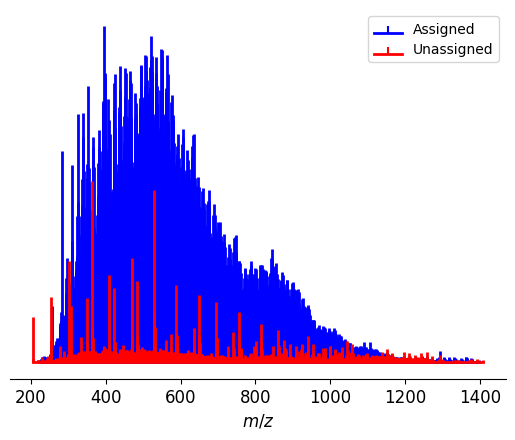

In [8]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

<Axes: title={'center': 'Van Krevelen Diagram - All Assigned Classes'}, xlabel='O/C', ylabel='H/C'>

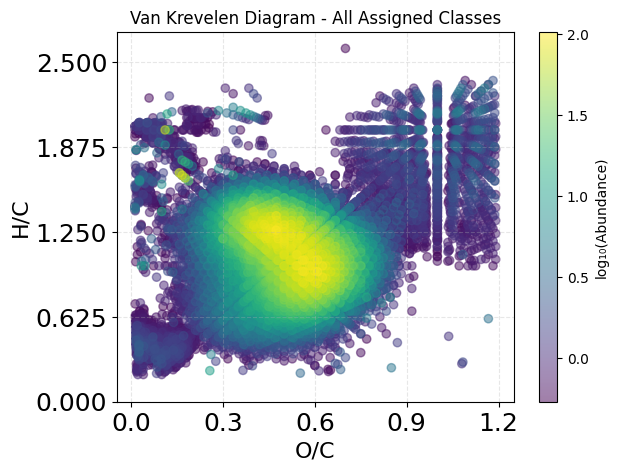

In [9]:
mass_spectrum_by_classes.plot_van_krevelen(log_abundance=True, max_oc=1.2)

In [ ]:
mass_spectrum_by_classes.plot_dbe_vs_carbon_number(log_abundance=True, max_dbe=55, max_c=110)

In [ ]:
mass_spectrum_by_classes.plot_mz_error()

In [ ]:
mass_spectrum_by_classes.plot_mz_error_class("O14")

### 6. Exploring Mass Spectrum
#### Top 20 Most Abundant

In [ ]:
for mspeaks in mass_spectrum.sort_by_abundance(reverse=True)[:20]:
    for mf in mspeaks:
        print(
            f"Abundance: {mspeaks.abundance:.2f} | "
            f"Exp m/z: {mspeaks.mz_exp:.7f} | "
            f"calc m/z: {mf.mz_calc:.6f} | "
            f"Error: {mf.mz_error:.6f} | "
            f"DBE: {mf.dbe} | "
            f"H/C: {mf.H_C:.6f} | "
            f"O/C: {mf.O_C:.6f} | "
            f"AI mod: {mf.A_I_mod:.6f} | "
            f"KMD: {mf.kmd:.4f} | "
            f"Class: {mf.class_label} | "
            f"Formula: {mf.string_formated}"
        )

#### Lowest 5 m/z


In [ ]:
n = 5
most_abundant_peaks = mass_spectrum.sort_by_mz()[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | "
        f"{mspeak.resolving_power:.1f} resolving power | "
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD"
    )

### 7. Exporting Molecular Formula Results


In [ ]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "2021May20_SRFA.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas DataFrame
df = mass_spectrum.to_dataframe()
df.head()

In [ ]:
df.sort_values(by=["Peak Height"], ascending=False).head(10)

In [ ]:
df.sort_values(by=["m/z"], ascending=True).head(10)

`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.


In [ ]:
for col in df.columns:
    print(col)

In [ ]:
from corems.mass_spectrum.output.export import HighResMassSpecExport

# Create an export instance
# You need to provide an output file path (even though we're just getting a DataFrame)
# Create output paths for different formats
csv_file = exports_dir / "2021May20_SRFA_plus.csv"

exporter = HighResMassSpecExport(csv_file, mass_spectrum, output_type="pandas")

# If you want additional columns (like Aromaticity Index)
df_with_extras = exporter.get_pandas_df(additional_columns=["Aromaticity Index"])

In [ ]:
df_with_extras.head()

In [ ]:
for col in df_with_extras.columns:
    print(col)